In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
print(data.shape)
print(data.dtypes)

(1190, 12)
age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object


We want to one-hot-encode all of the nominal categorical variables because there is no mathematical relation between the numbers. This prevents our models from misinterpreting the data

In [5]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['chest pain type', 'resting ecg', 'ST slope'])
one_hot_encoded_data.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_0,resting ecg_1,resting ecg_2,ST slope_0,ST slope_1,ST slope_2,ST slope_3
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,True,False,False,False,True,False,False
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,True,False,False,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,True,False,False,True,False,False
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,True,False,False,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,True,False,False,False,True,False,False


In [6]:
# split for convenience in next step (scaling)
df = one_hot_encoded_data.drop(columns = ['target'])
target = one_hot_encoded_data['target']

In [7]:
# Identify numerical columns and one-hot encoded columns
numerical_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
one_hot_columns = [col for col in df.columns if col not in numerical_columns]

# Apply StandardScaler only to numerical columns
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(df[numerical_columns])

# Convert the scaled numerical features back to a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_columns)

# Concatenate the scaled numerical columns with the one-hot encoded columns
scaled_features_df = pd.concat([scaled_numerical_df, df[one_hot_columns]], axis=1)

# Add the target column back to the DataFrame
scaled_features_df['target'] = target.reset_index(drop=True)

# Display the first few rows of the scaled dataset
scaled_features_df.head()

,age,resting bp s,cholesterol,max heart rate,oldpeak,sex,fasting blood sugar,exercise angina,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_0,resting ecg_1,resting ecg_2,ST slope_0,ST slope_1,ST slope_2,ST slope_3,target
0,-1.466728,0.427328,0.775674,1.265039,-0.849792,1,0,0,False,True,False,False,True,False,False,False,True,False,False,0
1,-0.504600,1.516587,-0.299512,0.637758,0.071119,0,0,0,False,False,True,False,True,False,False,False,False,True,False,1
2,-1.787437,-0.117301,0.716489,-1.636136,-0.849792,1,0,0,False,True,False,False,False,True,False,False,True,False,False,0
3,-0.611503,0.318402,0.035867,-1.244085,0.531575,0,0,1,False,False,False,True,True,False,False,False,False,True,False,1
4,0.029915,0.971958,-0.151550,-0.695214,-0.849792,1,0,0,False,False,True,False,True,False,False,False,True,False,False,0


Let's check the means and make sure that the values are centered around 0 (I rounded because I don't want to see very small numbers with e-17...)

In [8]:
round(scaled_features_df.mean(), 2)

age                   -0.00
resting bp s           0.00
cholesterol            0.00
max heart rate        -0.00
oldpeak                0.00
sex                    0.76
fasting blood sugar    0.21
exercise angina        0.39
chest pain type_1      0.06
chest pain type_2      0.18
chest pain type_3      0.24
chest pain type_4      0.53
resting ecg_0          0.57
resting ecg_1          0.15
resting ecg_2          0.27
ST slope_0             0.00
ST slope_1             0.44
ST slope_2             0.49
ST slope_3             0.07
target                 0.53
dtype: float64

## Exporatory Data Analysis

First, we check the histograms of all of the data so we can get a good idea of what the distribution looks like. This is important to see if we have an imbalanced dataset. Additionally, it lets us see if there are any outliers.

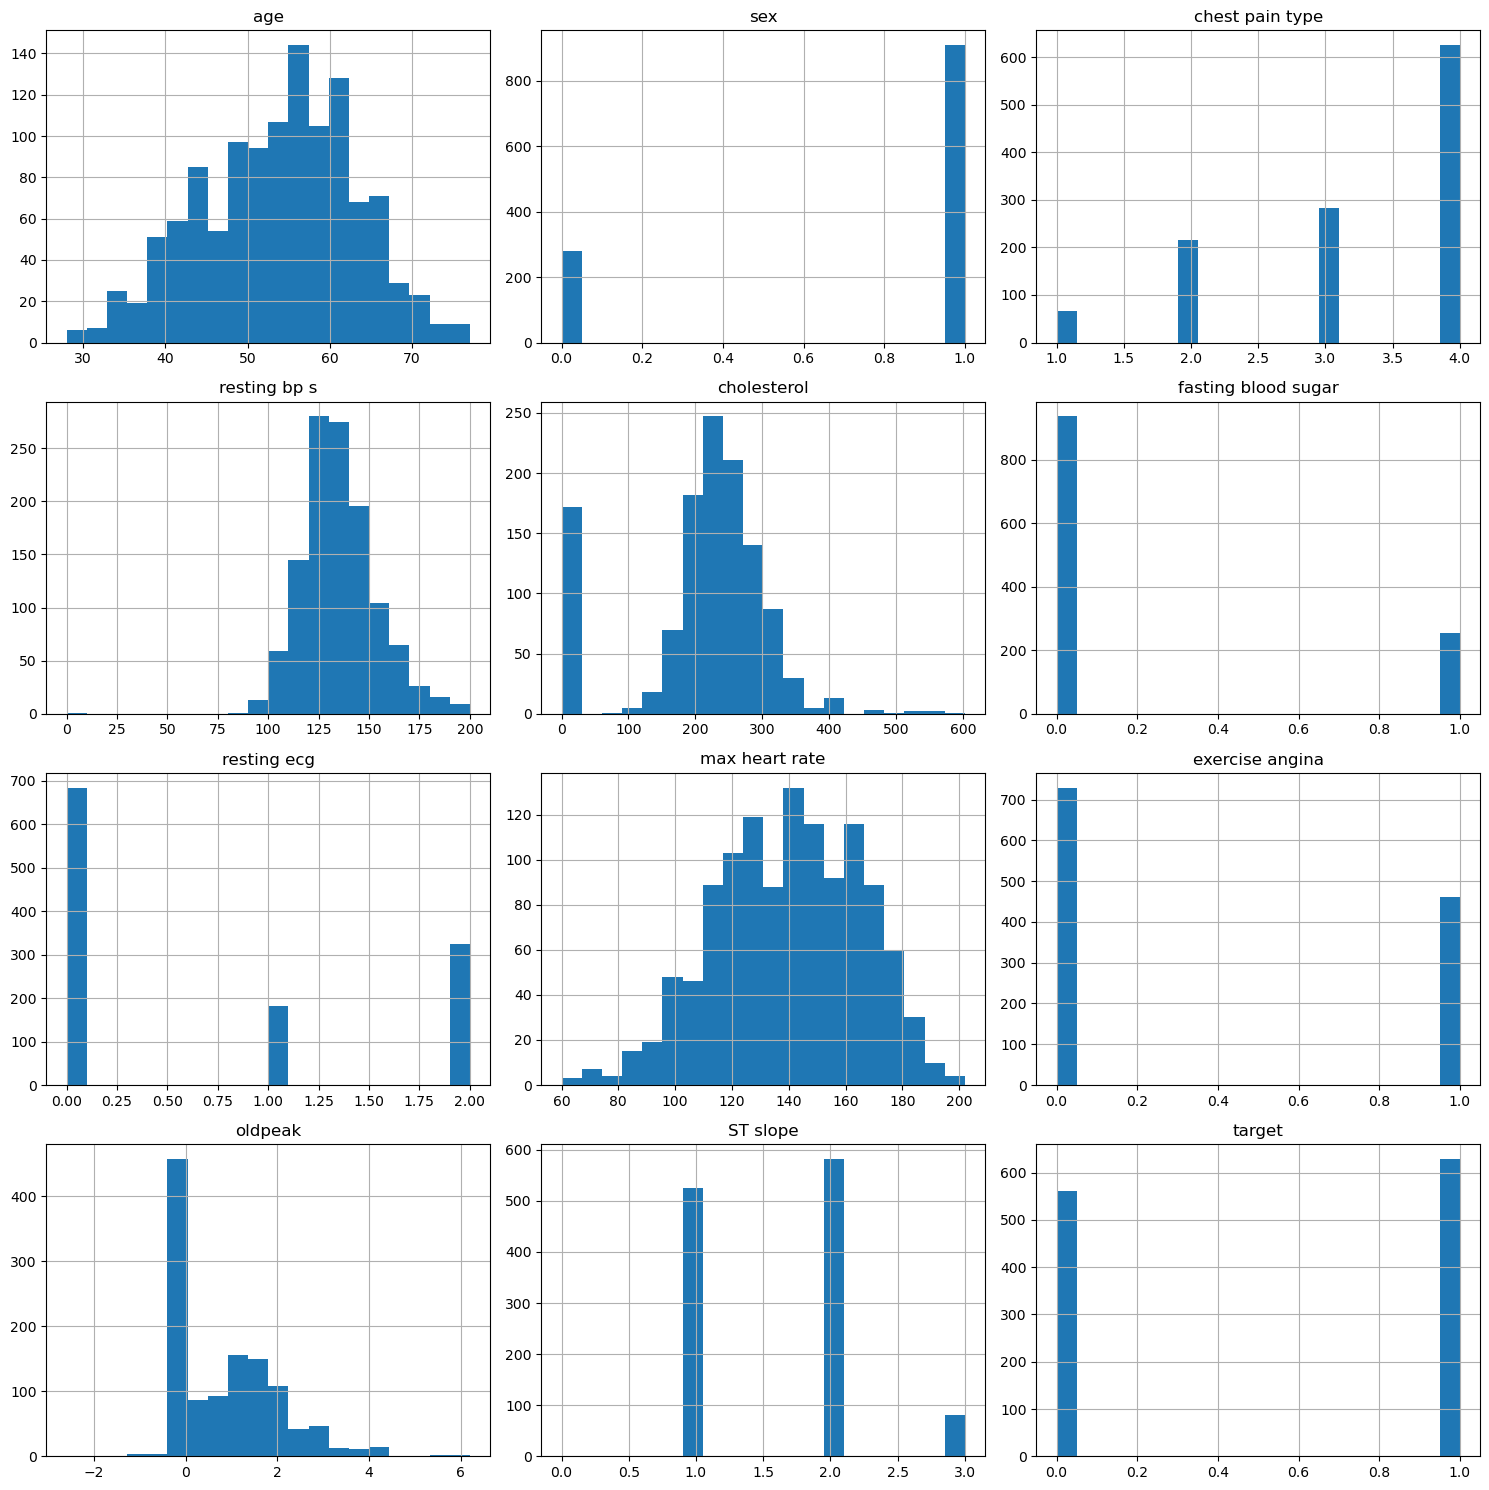

In [9]:
# Plot histograms for all columns for non-modified data so we can see the actual values
data.hist(bins=20, figsize=(15, 15))
plt.tight_layout()
plt.show()

We can see that our data is balanced. In addition, there are no/an insufficient amount of outliers in the data.
Next, we should compare the distributions of the variables between target 0 and target 1 observations

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


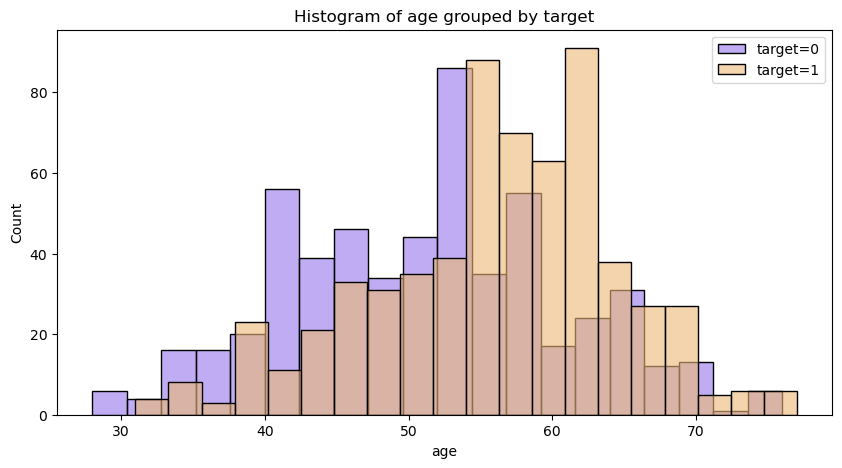

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


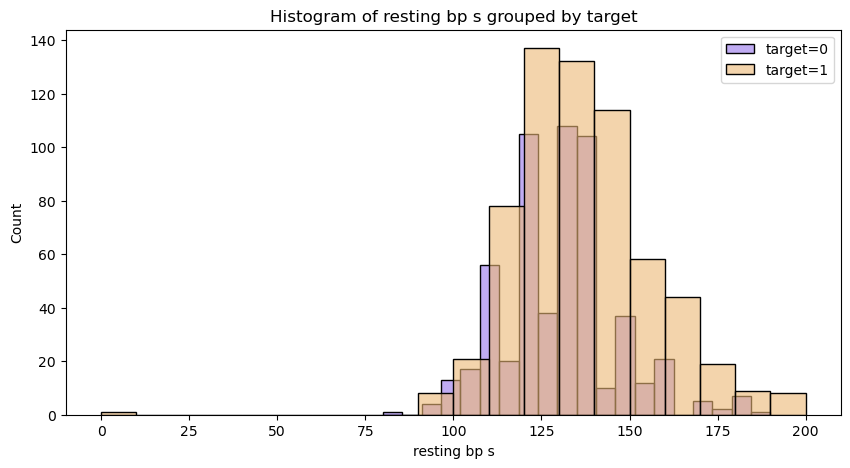

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


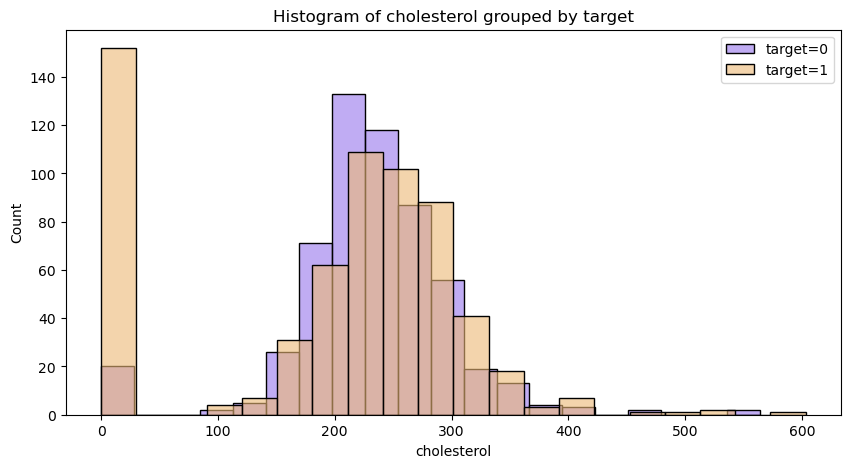

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


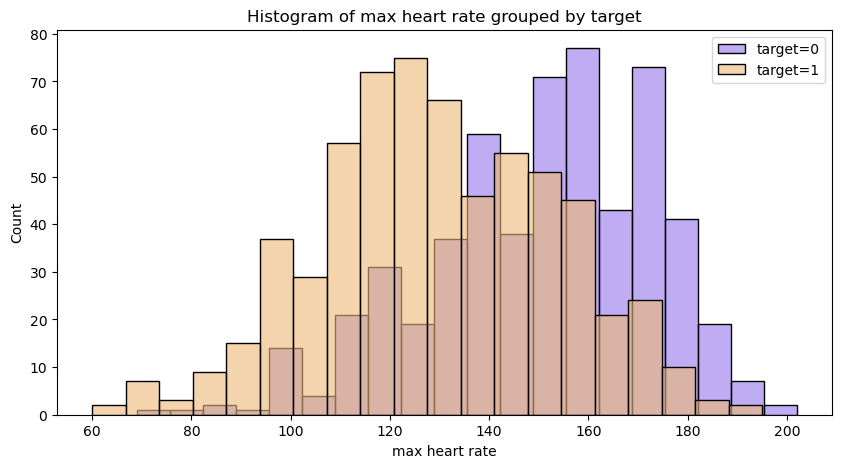

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


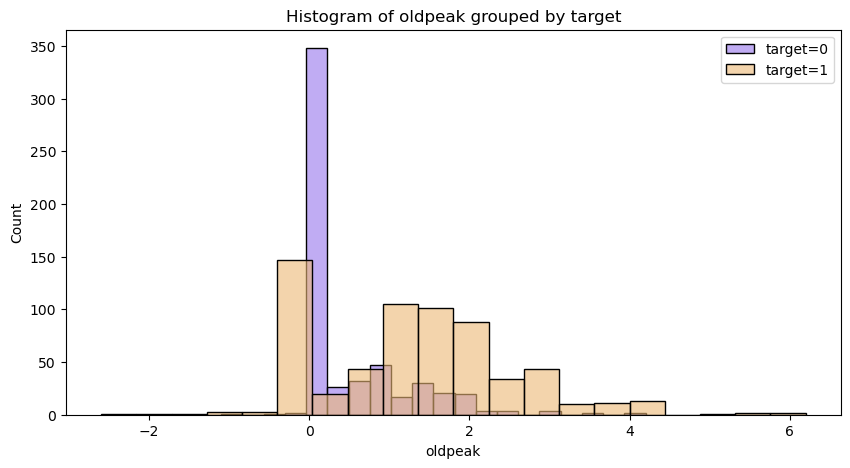

In [10]:
# Plot histograms for numerical columns grouped by target using the original data
numerical_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Create histograms for each numerical column, separated by target values
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    for target_value, color in zip([0, 1], ['#9775EC', '#ECB875']):
        subset = data[data['target'] == target_value]
        sns.histplot(subset[column], kde=False, bins=20, label=f"target={target_value}", alpha=0.6, color = color)
    plt.title(f"Histogram of {column} grouped by target")
    plt.legend()
    plt.show()

We can see in the numerical data that there is a small difference in distributions for the age and sex variables. We can also see a significant difference in the max heart rate and oldpeak distributions.

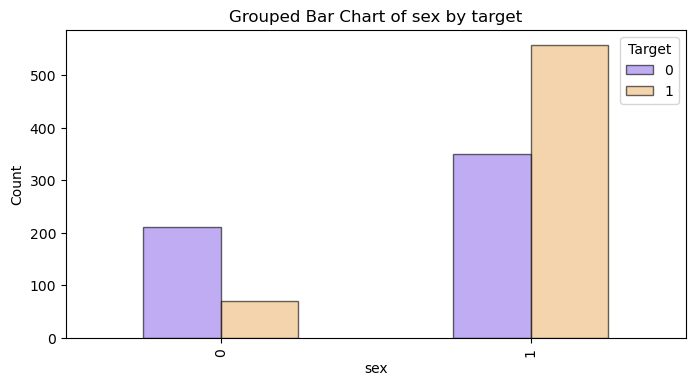

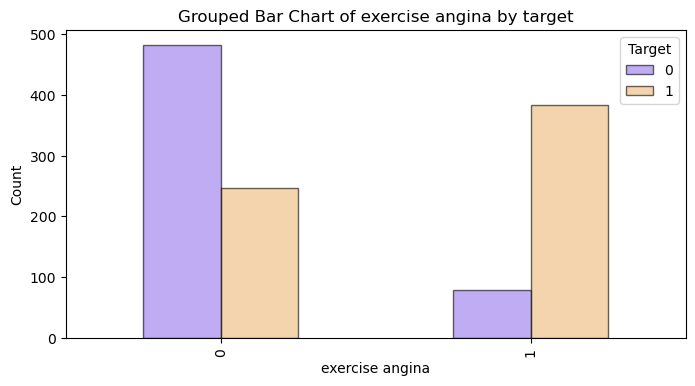

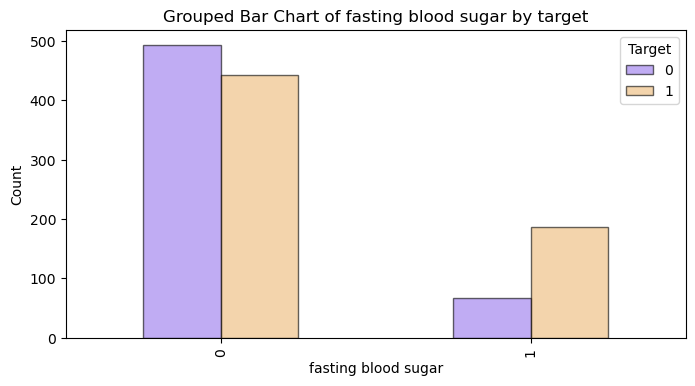

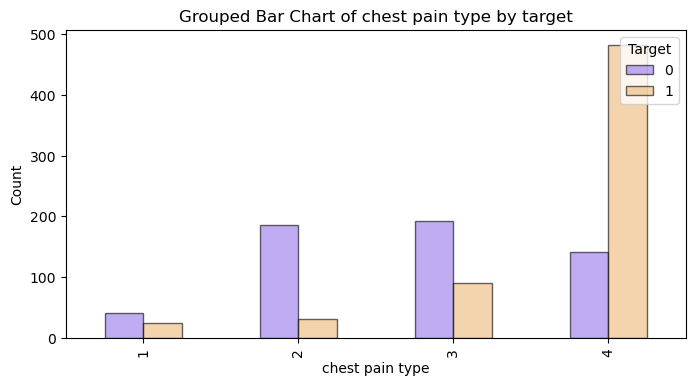

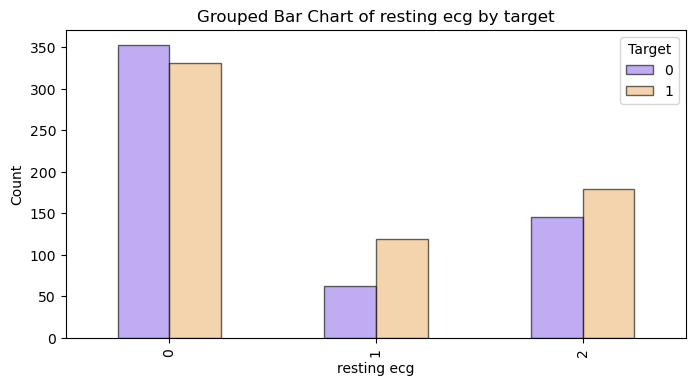

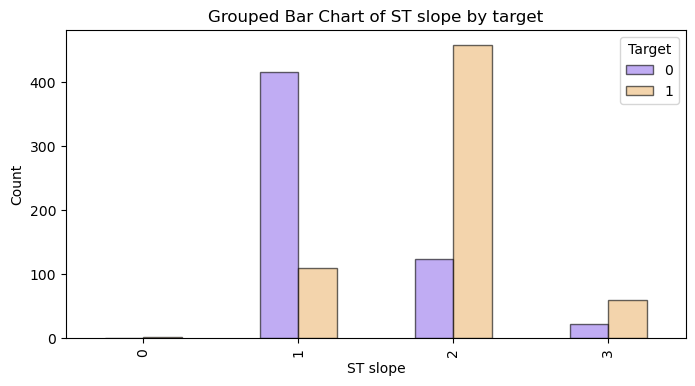

In [11]:
# Plot grouped bar charts for categorical columns grouped by target using hex codes for colors

# Identify categorical columns
categorical_columns = ['sex', 'exercise angina', 'fasting blood sugar', 'chest pain type',
                       'resting ecg', 'ST slope']

# Define colors for target values
colors = {0: '#9775EC', 1: '#ECB875'}

# Create grouped bar charts for each categorical column, separated by target values
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    counts = data.groupby([column, 'target']).size().unstack().fillna(0)
    counts.plot(kind='bar', stacked=False, color=[colors[0], colors[1]],
                ax=plt.gca(), edgecolor = 'black', alpha = 0.6)
    plt.title(f"Grouped Bar Chart of {column} by target")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(title='Target', loc='upper right')
    plt.show()

We can see notable differences in the grouped bar chart distributions for all variables excluding resting ecg.

In [12]:
# now that we're done with comparing distributions, let's remove target from the dataset
scaled_features_df = scaled_features_df.drop(columns = ['target'])
for col in scaled_features_df.columns:
  if scaled_features_df[col].dtype == 'bool':
    scaled_features_df[col] = scaled_features_df[col].astype('int')

# split data for testing
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target,
                                                    random_state = 123, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

(952, 19)
(952,)
(238, 19)
(238,)


,age,resting bp s,cholesterol,max heart rate,oldpeak,sex,fasting blood sugar,exercise angina,chest pain type_1,chest pain type_2,chest pain type_3,chest pain type_4,resting ecg_0,resting ecg_1,resting ecg_2,ST slope_0,ST slope_1,ST slope_2,ST slope_3
15,0.029915,-0.661931,0.617848,0.402527,0.531575,0,0,0,0,1,0,0,1,0,0,0,0,1,0
737,-0.504600,-0.661931,-0.220599,-0.028728,0.992031,1,0,0,0,0,1,0,1,0,0,0,0,1,0
171,-2.642661,-0.661931,0.321926,0.794578,-0.849792,1,0,0,0,1,0,0,1,0,0,0,1,0,0
943,-0.397697,0.427328,0.223285,0.912193,-0.297245,1,0,0,0,0,1,0,1,0,0,0,0,1,0
733,-0.825310,-0.661931,0.381110,0.167297,-0.113063,1,0,0,0,0,0,1,0,0,1,0,1,0,0


## Decision Tree

In [13]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [14]:


def k_fold_cv_decision_tree(X_train, y_train, X_test, y_test, k, max_depth_values):
    """
    k-fold cross-validation using Decision Tree model with hyperparameter tuning, evaluates on test set

    Parameters
    -----------
    X_train : feature data for training
    y_train : target data for training
    X_test : feature data for testing
    y_test : target data for testing
    k : number of folds
    max_depth_values : list of max_depth values to try

    Returns
    --------
    training_avg_scores : all the average scores of training (accuracy, precision, recall, F1) for each max_depth value
    test_scores : all the scores of testing (accuracy, precision, recall, F1) for each max_depth value
    cm : confusion matrix for test set
    """

    # to keep track of scores
    training_avg_scores = []
    test_scores = []
    
    for max_depth in max_depth_values:
         # kfold and scores before averaging
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        final_metrics = []

         # cross validation with k-fold
        for train_index, test_index in kf.split(X_train):
            X_train_cv, X_val_cv = X_train[train_index], X_train[test_index]
            y_train_cv, y_val_cv = y_train[train_index], y_train[test_index]

            #train model
            model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
            model.fit(X_train_cv, y_train_cv)
            y_val_pred = model.predict(X_val_cv)

            #calculate accuracy 
            accuracy = accuracy_score(y_val_cv, y_val_pred)
            precision = precision_score(y_val_cv, y_val_pred, average='macro')
            recall = recall_score(y_val_cv, y_val_pred, average='macro')
            f1 = f1_score(y_val_cv, y_val_pred, average='macro')
            final_metrics.append((accuracy, precision, recall, f1))

        #average the score
        scores = np.mean(final_metrics, axis=0)
        training_avg_scores.append(scores)

        #fit the model
        final_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        final_model.fit(X_train, y_train)
        y_test_pred = final_model.predict(X_test)

        #calculate accuracy
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='macro')
        test_recall = recall_score(y_test, y_test_pred, average='macro')
        test_f1 = f1_score(y_test, y_test_pred, average='macro')
        cm = confusion_matrix(y_test, y_test_pred)
        
        test_scores.append((test_accuracy, test_precision, test_recall, test_f1))

        #print scores
        print(f'Max Depth: {max_depth}')
        print(f'Mean CV Accuracy: {scores[0]}')
        print(f'Mean CV Precision: {scores[1]}')
        print(f'Mean CV Recall: {scores[2]}')
        print(f'Mean CV F1 Score: {scores[3]}')
        print(f'Test Accuracy: {test_accuracy}')
        print(f'Test Precision: {test_precision}')
        print(f'Test Recall: {test_recall}')
        print(f'Test F1 Score: {test_f1}')
        print('Confusion Matrix:')
        print(cm)

    return training_avg_scores, test_scores, cm


In [15]:
#call function
X_train_values = X_train.values
y_train_values = y_train.values
X_test_values = X_test.values
y_test_values = y_test.values

max_depth_values_array = [3, 5, 7, 9] 
training_scores_dt, test_scores_dt, confusion_matrix_dt = k_fold_cv_decision_tree(X_train_values, y_train_values, X_test_values, y_test_values, k=5, max_depth_values=max_depth_values_array)


Max Depth: 3
Mean CV Accuracy: 0.8057260953430697
Mean CV Precision: 0.8099355743217007
Mean CV Recall: 0.8066307119717058
Mean CV F1 Score: 0.8049701305957744
Test Accuracy: 0.8445378151260504
Test Precision: 0.8390909090909091
Test Recall: 0.8319243604004449
Test F1 Score: 0.8350781908418392
Confusion Matrix:
[[ 72  21]
 [ 16 129]]
Max Depth: 5
Mean CV Accuracy: 0.8393000826674015
Mean CV Precision: 0.8419808401360752
Mean CV Recall: 0.8398722787410058
Mean CV F1 Score: 0.8387521632768966
Test Accuracy: 0.8445378151260504
Test Precision: 0.8390909090909091
Test Recall: 0.8319243604004449
Test F1 Score: 0.8350781908418392
Confusion Matrix:
[[ 72  21]
 [ 16 129]]
Max Depth: 7
Mean CV Accuracy: 0.848724166437035
Mean CV Precision: 0.8496079776540618
Mean CV Recall: 0.8478641701259868
Mean CV F1 Score: 0.8479951788275375
Test Accuracy: 0.8613445378151261
Test Precision: 0.8571212121212122
Test Recall: 0.8495736002966259
Test F1 Score: 0.8529075756156943
Confusion Matrix:
[[ 74  19]
 [ 14

The results show that the decision tree with a max depth of 9 has an average score of about 85% to 87%. The max depth of 9 has the best scores compared to 3, 5, and 7. This can be because with a deeper decision tree, it increases how many splits a tree can make before coming to a prediction. The result shows that the accuracy is lower than Random Forest and Neural Network, but around the same as SVM and Logistic Regression. 

## KNN

In [16]:
def k_fold_cv_knn(X_train, y_train, X_test, y_test, k, n_neighbors_values):
    """
    k-fold cross-validation using KNN model with hyperparameter tuning, evaluates on test set

    Parameters
    -----------
    X_train : feature data for training
    y_train : target data for training
    X_test : feature data for testing
    y_test : target data for testing
    k : number of folds
    n_neighbors_values : list of n_neighbors values to try

    Returns
    --------
    training_avg_scores : all the average scores of training (accuracy, precision, recall, F1) for each n_neighbors value
    test_scores : all the scores of testing (accuracy, precision, recall, F1) for each n_neighbors value
    cm : confusion matrix for test set
    """
    
    # to keep track of scores
    training_avg_scores = []
    test_scores = []
    
    for n_neighbors in n_neighbors_values:
         # kfold and scores before averaging
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        final_metrics = []

         # cross validation with k-fold
        for train_index, test_index in kf.split(X_train):
            X_train_cv, X_val_cv = X_train[train_index], X_train[test_index]
            y_train_cv, y_val_cv = y_train[train_index], y_train[test_index]

            # train model
            model = KNeighborsClassifier(n_neighbors=n_neighbors)
            model.fit(X_train_cv, y_train_cv)
            y_val_pred = model.predict(X_val_cv)

            # calculate scores
            accuracy = accuracy_score(y_val_cv, y_val_pred)
            precision = precision_score(y_val_cv, y_val_pred, average='macro')
            recall = recall_score(y_val_cv, y_val_pred, average='macro')
            f1 = f1_score(y_val_cv, y_val_pred, average='macro')
            final_metrics.append((accuracy, precision, recall, f1))

        # calculate average 
        scores = np.mean(final_metrics, axis=0)
        training_avg_scores.append(scores)

        # fit model 
        final_model = KNeighborsClassifier(n_neighbors=n_neighbors)
        final_model.fit(X_train, y_train)
        y_test_pred = final_model.predict(X_test)

        # calculate scores
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='macro')
        test_recall = recall_score(y_test, y_test_pred, average='macro')
        test_f1 = f1_score(y_test, y_test_pred, average='macro')
        cm = confusion_matrix(y_test, y_test_pred)

        # print results
        print(f'Number of Neighbors: {n_neighbors}')
        print(f'Mean CV Accuracy: {scores[0]}')
        print(f'Mean CV Precision: {scores[1]}')
        print(f'Mean CV Recall: {scores[2]}')
        print(f'Mean CV F1 Score: {scores[3]}')
        print(f'Test Accuracy: {test_accuracy}')
        print(f'Test Precision: {test_precision}')
        print(f'Test Recall: {test_recall}')
        print(f'Test F1 Score: {test_f1}')
        print('Confusion Matrix:')
        print(cm)

        test_scores.append((test_accuracy, test_precision, test_recall, test_f1))

    return training_avg_scores, test_scores, cm


In [17]:
#call fuction
n_neighbors_values = [3, 5, 7, 9]  
knn_results, knn_test_results, knn_cm = k_fold_cv_knn(X_train_values, y_train_values, X_test_values, y_test_values, k=5, n_neighbors_values=n_neighbors_values)


Number of Neighbors: 3
Mean CV Accuracy: 0.8298815100578671
Mean CV Precision: 0.8317112545483839
Mean CV Recall: 0.8287884397043449
Mean CV F1 Score: 0.8287395953079029
Test Accuracy: 0.8571428571428571
Test Precision: 0.8508634222919937
Test Recall: 0.8480533926585094
Test F1 Score: 0.849389517569982
Confusion Matrix:
[[ 75  18]
 [ 16 129]]
Number of Neighbors: 5
Mean CV Accuracy: 0.8487462110774319
Mean CV Precision: 0.8510078387397411
Mean CV Recall: 0.847611289510993
Mean CV F1 Score: 0.8478074816086666
Test Accuracy: 0.8361344537815126
Test Precision: 0.8300757575757576
Test Recall: 0.8230997404523545
Test F1 Score: 0.8261634984549113
Confusion Matrix:
[[ 71  22]
 [ 17 128]]
Number of Neighbors: 7
Mean CV Accuracy: 0.85193166161477
Mean CV Precision: 0.8535616791646993
Mean CV Recall: 0.8509637976350328
Mean CV F1 Score: 0.8511289764012314
Test Accuracy: 0.8445378151260504
Test Precision: 0.8390909090909091
Test Recall: 0.8319243604004449
Test F1 Score: 0.8350781908418392
Confusi

The results show that KNN with 9 neighbors has an average score of about 85% to 87%. The model with 9 neighbors has the best scores compared to 3, 5, and 7. This can be because with a increased neighbor count, the model can do more training before coming to a prediction. The result shows that the accuracy is lower than Random Forest and Neural Network, but around the same as SVM, Logistic Regression, and Decision Tree. 